In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Parameter scenarios

In [26]:
df_parameter = pd.read_csv('evaluation_results_parameter.csv')

In [27]:
df_parameter

,Setup,Activation,LearningRate,Epochs,SNR(dB),SpectralEfficiency
0,0db,relu,0.00100,100,-20,0.319179
1,0db,relu,0.00100,100,-15,0.746775
2,0db,relu,0.00100,100,-10,1.448309
3,0db,relu,0.00100,100,-5,2.413790
4,0db,relu,0.00100,100,0,3.617226
...,...,...,...,...,...,...
238,0db,sigmoid,0.00001,1000,0,3.528723
239,0db,sigmoid,0.00001,1000,5,4.945480
240,0db,sigmoid,0.00001,1000,10,6.487239
241,0db,sigmoid,0.00001,1000,15,8.093671


#### Compute summed SE

In [30]:
df_summed_se = df_parameter.groupby(['Activation','LearningRate','Epochs']).agg(
    {'SpectralEfficiency':'sum',
    }).reset_index()
df_summed_se.head()

,Activation,LearningRate,Epochs,SpectralEfficiency
0,relu,0.00001,100,35.637077
1,relu,0.00001,500,37.192214
2,relu,0.00001,1000,37.248853
3,relu,0.00010,100,37.384750
4,relu,0.00010,500,37.651309


#### Aggregate Epochs and Learning rate

In [31]:
df_summed_se.groupby(['Epochs','LearningRate']).agg(
    {'SpectralEfficiency':'mean',
    }).reset_index()


,Epochs,LearningRate,SpectralEfficiency
0,100,0.00001,33.402101
1,100,0.00010,37.535217
2,100,0.00100,38.336505
3,500,0.00001,36.704965
4,500,0.00010,38.069970
5,500,0.00100,38.262203
6,1000,0.00001,37.358119
7,1000,0.00010,37.858106
8,1000,0.00100,38.408424


#### Aggregate Activation function

In [35]:
df_summed_se.groupby(['Activation']).agg(
    {'SpectralEfficiency':'mean',
    }).reset_index()

,Activation,SpectralEfficiency
0,relu,37.368769
1,sigmoid,37.362116
2,tanh,37.247652


### Channel scenarios

#### Varying PNR

In [17]:
df_channel = pd.read_csv('evaluation_results_channel.csv')

In [19]:
df_pnr = df_channel[df_channel.Setup.isin(['-20db','0db','20db'])]
df_pnr.columns = ['PNR(dB)','Activation','LearningRate','Epochs','SNR(dB)','SpectralEfficiency']

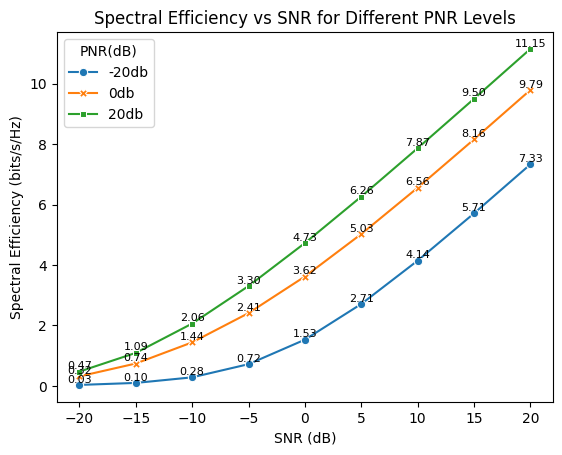

In [ ]:
# Original lineplot
sns.lineplot(
    data=df_pnr,
    x='SNR(dB)',
    y='SpectralEfficiency',
    hue='PNR(dB)',
    style='PNR(dB)',
    markers=True,
    dashes=False
)
plt.xlabel('SNR (dB)')
plt.ylabel('Spectral Efficiency (bits/s/Hz)')
# Add annotations
for _, row in df_pnr.iterrows():
    plt.text(
        row['SNR(dB)'], row['SpectralEfficiency'] + 0.02,  # slight offset
        f"{row['SpectralEfficiency']:.2f}",
        ha='center', va='bottom', fontsize=8
    )

plt.title('Spectral Efficiency vs SNR for Different PNR Levels')
plt.show()


#### Varying Lest

In [22]:
df_lest = df_channel[df_channel.Setup.isin(['Lest1','Lest2'])]
df_lest.columns = ['Lest','Activation','LearningRate','Epochs','SNR(dB)','SpectralEfficiency']

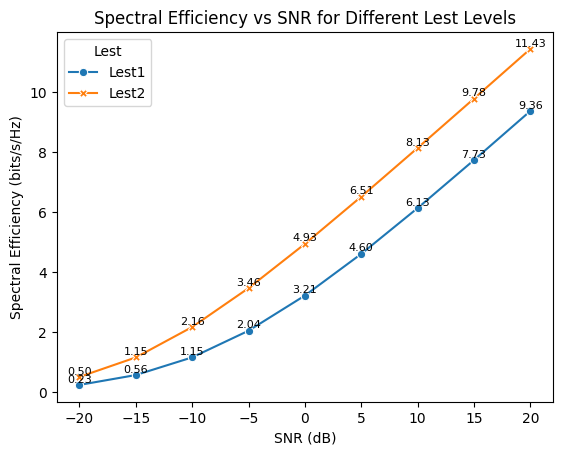

In [23]:
# Original lineplot
sns.lineplot(
    data=df_lest,
    x='SNR(dB)',
    y='SpectralEfficiency',
    hue='Lest',
    style='Lest',
    markers=True,
    dashes=False
)
plt.xlabel('SNR (dB)')
plt.ylabel('Spectral Efficiency (bits/s/Hz)')
# Add annotations
for _, row in df_lest.iterrows():
    plt.text(
        row['SNR(dB)'], row['SpectralEfficiency'] + 0.02,  # slight offset
        f"{row['SpectralEfficiency']:.2f}",
        ha='center', va='bottom', fontsize=8
    )

plt.title('Spectral Efficiency vs SNR for Different Lest Levels')
plt.legend(title='Lest', loc='upper left')
plt.show()


,Epochs,LearningRate,SpectralEfficiency
0,100,0.00001,33.402101
1,100,0.00010,37.535217
2,100,0.00100,38.336505
3,500,0.00001,36.704965
4,500,0.00010,38.069970
5,500,0.00100,38.262203
6,1000,0.00001,37.358119
7,1000,0.00010,37.858106
8,1000,0.00100,38.408424
